# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 2 submission</b></u>

### Roster Name: Benjamin Wu
### Student ID: 01367880
### Email address: benjamin.wu01@sjsu.edu

##  <u>References and sources </u>

https://www.delftstack.com/howto/python-pandas/

https://www.delftstack.com/howto/python/python-counter-most-common/#:~:text=Ways%20to%20Find%20the%20Most%20Common%20Elements%20of,Most%20Common%20Elements%20of%20a%20List%20in%20Python

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [339]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
import math

In [340]:
np.random.seed(42)


#### Code the solution

In [341]:
n = 100

Y = np.random.randn(n)
X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/2))
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/2))
X = np.concatenate((X1, X2), axis=0)

l1 = [0]*int(n/2)
l2 = [1]*int(n/2)
labels = l1+l2
dt = pd.DataFrame({'X':X, 'Y':Y, "Label": labels}, columns=['X', 'Y', "Label"])
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)

In [342]:
def knn(newObservation, referenceData, k = 3):
    observations = []
    neighbors = []
    for i in range(len(referenceData)):
        observed = np.resize(newObservation.to_numpy(), (len(newObservation.to_numpy()) - 1)) # Resizes numpy array to remove label
        reference = np.resize(referenceData.iloc[i].to_numpy(), (len(referenceData.iloc[i].to_numpy()) - 1)) # Resizes numpy array to remove label
        observations.append((referenceData.iloc[i].name, euclidean(observed, reference)))
    observations.sort(key = lambda a: a[1]) # Sorts based on distance
    for i in range(k):
        neighbors.append(referenceData.loc[observations[i][0]]["Label"]) # Adds k closest neighbors' labels
    classification = Counter(neighbors)
    return(math.trunc(classification.most_common(1)[0][0])) # Returns the most common label

In [343]:
predictedOutput = []
for i in range(len(X_test)):
    predictedOutput.append(knn(X_test.iloc[i,:], X_train, k = 3))

Accuracy of the predictions on the test dataset is 90.0


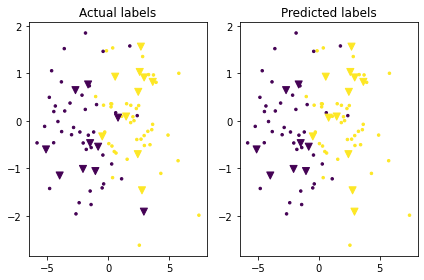

In [344]:
count = 0
for i in range(len(Y_test)):
    if(Y_test[i] != predictedOutput[i]):
        count += 1
print("Accuracy of the predictions on the test dataset is " + str((len(predictedOutput) - count) / len(predictedOutput) * 100))

plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=Y_test, marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c=Y_train, marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c=predictedOutput, marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()

In [345]:
n = 1000

X1 = np.random.normal(loc = 0, scale = 3, size=int(n/4))
Y1 = np.random.normal(loc = -3, scale = 1, size=int(n/4))
Z1 = np.random.normal(loc = -1, scale = 1, size=int(n/4))

X2 = np.random.normal(loc = 0, scale = 3, size=int(n/4))
Y2 = np.random.normal(loc = 1, scale = 2, size=int(n/4))
Z2 = np.random.normal(loc = 1, scale = 1, size=int(n/4))

X3 = np.random.normal(loc = 0, scale = 3, size=int(n/4))
Y3 = np.random.normal(loc = 3, scale = 1, size=int(n/4))
Z3 = np.random.normal(loc = 4, scale = 1, size=int(n/4))

X4 = np.random.normal(loc = 0, scale = 3, size=int(n/4))
Y4 = np.random.normal(loc = 5, scale = 3, size=int(n/4))
Z4 = np.random.normal(loc = -3, scale = 1, size=int(n/4))

X = np.concatenate((X1, X2, X3, X4), axis=0)
Y = np.concatenate((Y1, Y2, Y3, Y4), axis=0)
Z = np.concatenate((Z1, Z2, Z3, Z4), axis=0)

labels = ([0] * int(n/4) + [1] * int(n/4) + [2] * int(n/4) + [3] * int(n/4))

dt = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z, "Label": labels}, columns=['X', 'Y', 'Z', "Label"])
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels, test_size=0.2, random_state=0)

In [346]:
predictedOutput = []
for i in range(len(X_test)):
    predictedOutput.append(knn(X_test.iloc[i,:], dt, k = 3))

In [347]:
count = 0

for i in range(len(Y_test)):
    if(Y_test[i] != predictedOutput[i]):
        count += 1

print("Accuracy of the predictions on the test dataset is " + str((len(predictedOutput) - count) / len(predictedOutput) * 100))

Accuracy of the predictions on the test dataset is 98.0
